Ce notebook reprend le cours n°1 sur les tendances de abcbouse dont le lien vers la page est juste en dessous. Il est intéressant d'ouvrir le lien et de lirre la page avant de lancer les codes afin
de mieux saisir les concepts de base
https://www.abcbourse.com/apprendre/11_lecon1.html

In [1]:
# On importe une librairie qui permet de ne pas prendre en compte certaines erreurs un peu
# boring à traiter pendant notre code
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from scipy.signal import argrelextrema
from datetime import date 

# on importe tous les modules (codes) qui nous simplifiront la vie
# et nous permettront de tracer des beaux graphiques
# faire des beaux tableaux etc...

In [3]:
# Ici on récupère sur wikipedia la liste des entreprises du Standard And Poor
# ainsi que les tickers (nom de l'entreprise sur le marché)
# par exemple AMZN pour Amazon

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies' # le lien wikipedia
df = pd.read_html(url, header=0)[0] # on extrait le tableau de wikipedia
liste_tickers = df['Symbol'].to_list() # on transforme les tickers du tableau en une 'liste'
liste_tickers # on affiche cette liste avec tous les tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [4]:
# On utilise le module datetime qui nous permet d'obtenir la date du jour
# à chaque fois qu'on lancera le code avec la méthode date.today()
aujourdhui = date.today()
date_formatee = aujourdhui.strftime("%Y-%m-%d") # on met au bon format la date pour qu'elle soit exploitable dans la suite du code 
date_formatee

# On s'intéresse ici à GOOGLE et dans la liste des tockers récupérée sur wikipedia dans la cellule
# de code précédente, on voit que GOOGLE est identifié en bourse par le ticker GOOGL
# on va donc mettre ce ticker dans une variable pour pouvoir le réutiliser autant de fois
# qu'on veut par la suite 
symbole = 'GOOGL'

# avec le module yahoo finance importé sous le nom de 'yf'
# on crée un objet Ticker et on lui donne le symbole GOOGL 
# cet objet contient un ensemble d'informations sur l'entreprise qu'on lui donne entre paranthèses
ticker = yf.Ticker(symbole)

# à partir de cet objet on va récupérer en particulier la série du cours de bourse avec la méthode
# .history, il faut préciser la date de début souhaitée et la date de fin
# c'est là qu'entre en jeu pour la date de fin notre variable 'date_formatee' qui rappelez vous
# contient la date d'aujourd'hui (jour où vous lancez le code sur votre ordinateur)
data = ticker.history(start='2023-06-27',
                     end=date_formatee)

# une fois le dataset des cours de bourse crée, nous sélectionnons en particulier la colonne
# qui contient le cours de clôture. En finance, il est commun d'utiliser le cours de clôture
# pour certaines méthodes d'évaluation
data = data[['Close']]

### Tracer une bande de résistance 

In [5]:
# On utilise le module datetime qui nous permet d'obtenir la date du jour
# à chaque fois qu'on lancera le code avec la méthode date.today()
aujourdhui = date.today()
date_formatee = aujourdhui.strftime("%Y-%m-%d") # on met au bon format la date pour qu'elle soit exploitable dans la suite du code 
date_formatee

symbole = 'GOOGL'  # on créee une variable qui contient le ticker de GOOGLE

ticker = yf.Ticker(symbole) # On créee un objet ticker qui contient un plein d'informations sur GOOGLE

# Dans cet objet ticker on peut par exemple récupérer les cours de bourse de GOOGLE
# sur une période au choix qu'on précise dans la fonction 'history' qui contient l'historique 
# des données de marché de GOOGLE
# on précise la date de début de notre choix dans 'start'
# on précise la date de fin de notre choix dans 'end'
data = ticker.history(start='2023-06-27',
                     end=date_formatee)  

# si vous lancez le code data.head() vous verrez que dans l'objet 'data' nous avons plusieurs cours
# comme le cours d'ouverture, le cours le plus haut, le cours le plus bas ...
# Nous sélectionnons seulement le cours de clôture nommé 'Close'
data = data[['Close']]

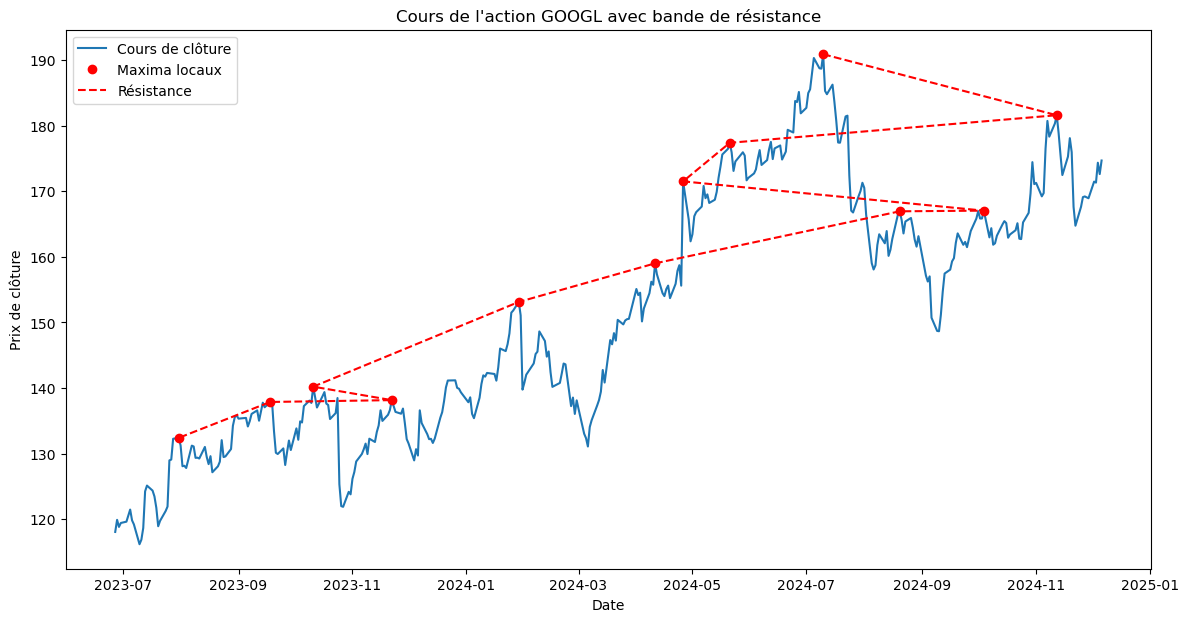

In [15]:
n = 10  # Comparaison avec les n voisins de chaque côté
local_max = argrelextrema(data['Close'].values, np.greater, order=n)[0]
# argrelextrema : Cette fonction de scipy.signal 
# identifie les indices des maximums locaux dans une série de données. (où ils se trouvent)
# la série donnée ici c'est data['Close'].values
# np.greater : Cherche les points où la valeur est supérieure aux voisins, identifiant ainsi les maximums
# order=n : Spécifie le nombre de points de chaque côté à comparer pour déterminer un maximum local
# local_max est alors une liste qui contient un tableau qui lui_même contient les indices
# avec le sélecteur [0] on choisit le premier élément de cette liste, à savoir le tableau lui-même
# qui contient les indices
# récap : on utilise une fonction qui prend les extrêmes on lui dit prends moi les extrêmes les plus
# hauts, on lui précise combien de points elle doit comparer pour choisir les plus hauts


# Sélectionner les 6 maximums locaux les plus élevés
# en réalité ici c'est vous qui choisissez le nombre de maximums locaux à relier par une droite
# un classique un peu arbitraire étant que si vous pouvez tracer une ligne entre 3 maximums
# locaux, celà signifie que le cours de bourse a frappé 3 fois une bande de résistance
# cette bande apparaît comme assez solide et difficile à percer, 
# en conséquence si le cours de bourse vient traverser (dépasser) cette bande alors on peut
# raisonnablement penser qu'il va continuer de monter car il vient de franchir un seuil de résistance
# installé depuis un moment déjà

# Maintenant on a les indices des points les plus hauts
# on va donc créer un mini dataframe avec ces seuls points les plus hauts
# ici on sélectionne dans le data frame les points les plus hauts avec le code 
# data['Close'].iloc[local_max]
# Des maximum locaux il y en a plus que 6 dans le mini data frame ici avec la méthode .nlargest(6)
# on ne garde que les 6 plus grands
selected_max = data['Close'].iloc[local_max].nlargest(17)

# Tracer les cours de l'action
plt.figure(figsize=(14, 7)) # on choisit les dimensions du cadre, du graphique
plt.plot(data.index, data['Close'], label='Cours de clôture') # on trace la figure en donnant
# à la fonction plot la valeur de l'axe des abscisses (data.index), la valeur des ordonnées, data['Close']
# et un nom au graphique label='Cours de clôture'

# Tracer la ligne de résistance à travers les trois points sélectionnés
# .index permet de sélectionner la date
# .value permet de sélectionner la valeur (le cours de bourse)
# 'ro' signifie qu'on veut tracer des points rouges (red o)
# 'r--' signifie qu'on veut tracer une ligne en tirets --------- et 'r' signifie 'red' pour rouge
plt.plot(selected_max.index, selected_max.values, 'ro', label='Maxima locaux') 
plt.plot(selected_max.index, selected_max.values, 'r--', label='Résistance')

# Ajouter des titres et légendes
# le xlabel est le titre de l'axe des 'x', des abscisses
# le ylabel est le titre de l'axe des 'y' , des ordonnées
plt.title(f'Cours de l\'action {ticker.ticker} avec bande de résistance')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

### Tous les points sont reliés sur le graphique du dessus mais on aimerait plutôt avoir 2 bandes de résistances distinctes alors nous allons séparer dans le code qui suit les 3 points qui permettront d'obtenir la bande de résistance de gauche et les 3 points qui permettront d'obtenir la bande de résistance de droite

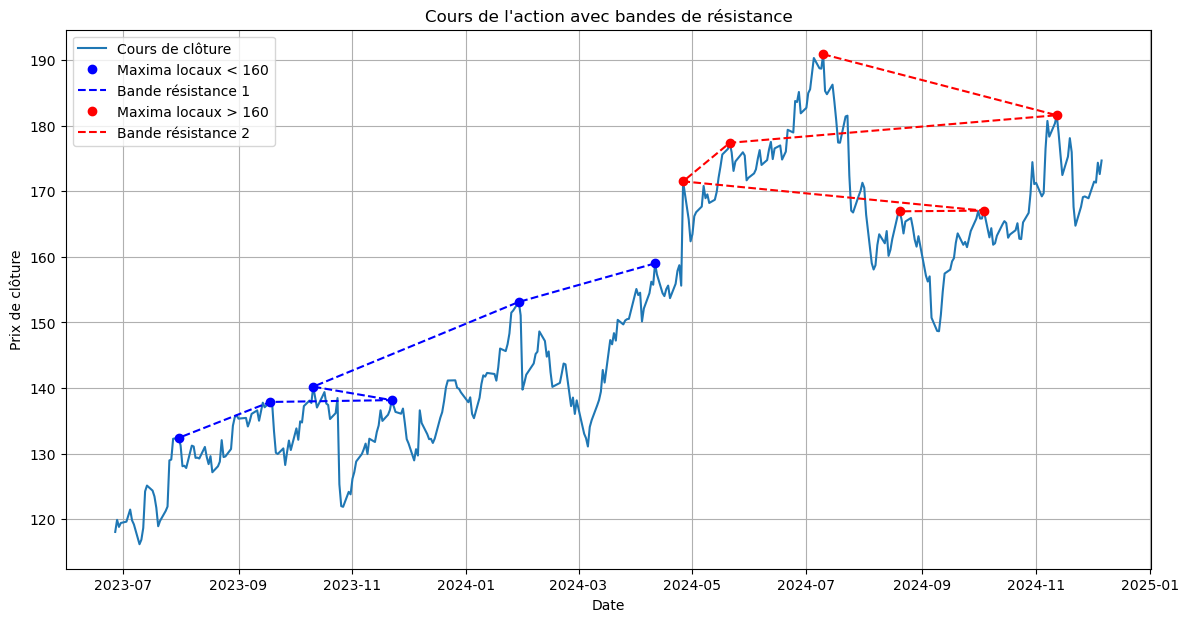

In [16]:
# Pour séparer nos points on créer 2 objets différents de type Series
# car le type Series nous permettra plus facilement de garder la Date et le cours
# pour le moment ces objets sont vides, on va les remplir dans la suite du code
max_locaux1 = pd.Series()
max_locaux2 = pd.Series()

# il est l'heure de remplir ces 2 objets max_locaux1 et max_locaux2
# pour ce faire on fait une boucle qui itère sur selected_max qui rappelez vous contient
# tous les max_locaux
# et on dit : si le cours est plus petit que 160 tu me mets les max locaux dans la variable
# max_locaux1, si ils sont plus grands que 160 alors tu les mets dans la variable max_locaux2
# précisons que la méthode .at[index] permet de dire à l'objet Series que l'index qu'on avait
# dans la variable selected_max (la date) doit aussi être l'index dans la variable max_locaux
for index, valeur in selected_max.items():
    if valeur < 160:
        max_locaux1.at[index] = valeur
    else:
        max_locaux2.at[index] = valeur

# Affichage des résultats si vous voulez regarder ce que contiennent vos listes
# décommentez les 2 lignes de code suivantes et lancez le code de la cellule vous verrez à quoi
# ressemblent max_locaux1 et 2
# print('max_locaux1 (valeurs < 160):\n', max_locaux1)
# print('\nmax_locaux2 (valeurs >= 160):\n', max_locaux2)


# Tracer le graphique
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Cours de clôture')

# Tracer les points correspondant aux maxima locaux
# et les lignes qui les relient pour max_locaux1
plt.plot(max_locaux1.index, max_locaux1.values, 'bo', label='Maxima locaux < 160')
plt.plot(max_locaux1.index, max_locaux1.values, linestyle= '--', color='blue', label='Bande résistance 1')


# Tracer les points correspondant aux maxima locaux
# et les lignes qui les relient pour max_locaux2
plt.plot(max_locaux2.index, max_locaux2.values, 'ro', label='Maxima locaux > 160')
plt.plot(max_locaux2.index, max_locaux2.values, linestyle= '--',  color='red', label='Bande résistance 2')


# Ajouter des titres et légendes
plt.title('Cours de l\'action avec bandes de résistance')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.grid(True) # Ajouter une grille
plt.show() # Afficher le tout 

### Plus qu'à tout reprendre avec les min locaux pour tracer le support

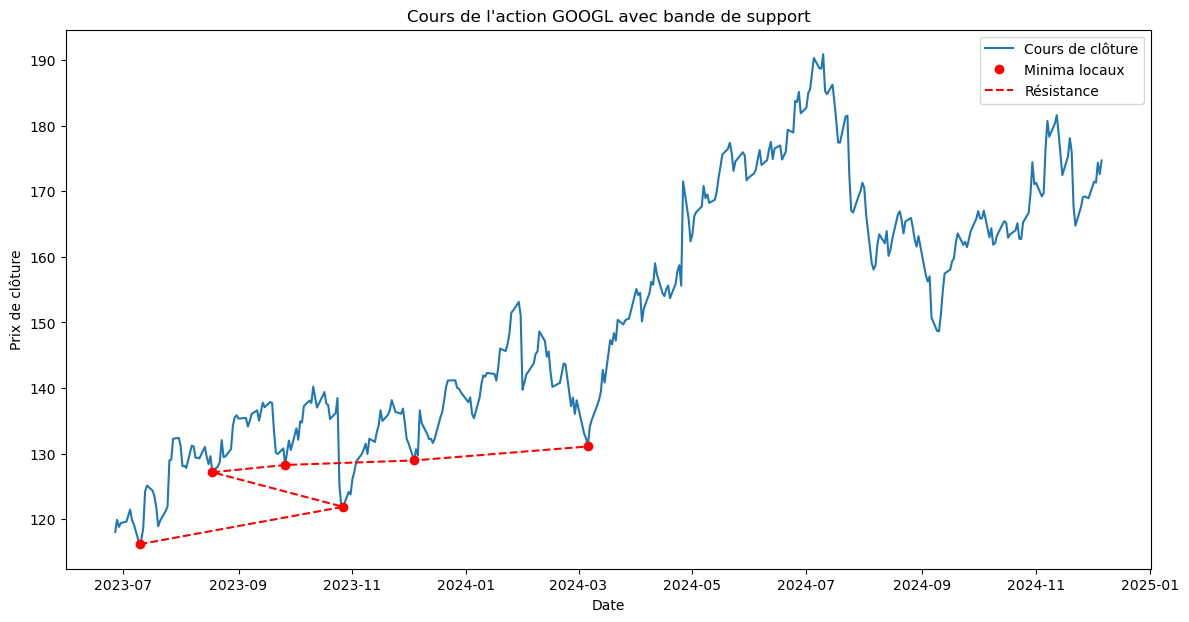

In [17]:
n = 15  # Comparaison avec les n voisins de chaque côté
local_min = argrelextrema(data['Close'].values, np.less, order=n)[0]
# argrelextrema : Cette fonction de scipy.signal 
# identifie les indices des maximums locaux dans une série de données. (où ils se trouvent)
# la série donnée ici c'est data['Close'].values
# np.greater : Cherche les points où la valeur est supérieure aux voisins, identifiant ainsi les maximums
# order=n : Spécifie le nombre de points de chaque côté à comparer pour déterminer un maximum local
# local_max est alors une liste qui contient un tableau qui lui_même contient les indices
# avec le sélecteur [0] on choisit le premier élément de cette liste, à savoir le tableau lui-même
# qui contient les indices
# récap : on utilise une fonction qui prend les extrêmes on lui dit prends moi les extrêmes les plus
# hauts, on lui précise combien de points elle doit comparer pour choisir les plus hauts


# Sélectionner les 6 maximums locaux les plus élevés
# en réalité ici c'est vous qui choisissez le nombre de maximums locaux à relier par une droite
# un classique un peu arbitraire étant que si vous pouvez tracer une ligne entre 3 maximums
# locaux, celà signifie que le cours de bourse a frappé 3 fois une bande de résistance
# cette bande apparaît comme assez solide et difficile à percer, 
# en conséquence si le cours de bourse vient traverser (dépasser) cette bande alors on peut
# raisonnablement penser qu'il va continuer de monter car il vient de franchir un seuil de résistance
# installé depuis un moment déjà

# Maintenant on a les indices des points les plus bas
# on va donc créer un mini dataframe avec ces seuls points les plus bas
# ici on sélectionne dans le data frame les points les plus bas avec le code 
# data['Close'].iloc[local_min]
# Des minima locaux il y en a plus que 6 dans le mini data frame ici avec la méthode .nsmallest(6)
# on ne garde que les 6 plus petits
selected_min = data['Close'].iloc[local_min].nsmallest(6)

# Tracer les cours de l'action
plt.figure(figsize=(14, 7)) # on choisit les dimensions du cadre, du graphique
plt.plot(data.index, data['Close'], label='Cours de clôture') # on trace la figure en donnant
# à la fonction plot la valeur de l'axe des abscisses (data.index), la valeur des ordonnées, data['Close']
# et un nom au graphique label='Cours de clôture'

# Tracer la bande support à travers points sélectionnés
# .index permet de sélectionner la date
# .value permet de sélectionner la valeur (le cours de bourse)
# 'ro' signifie qu'on veut tracer des points rouges (red o)
# 'r--' signifie qu'on veut tracer une ligne en tirets --------- et 'r' signifie 'red' pour rouge
plt.plot(selected_min.index, selected_min.values, 'ro', label='Minima locaux') 
plt.plot(selected_min.index, selected_min.values, 'r--', label='Résistance')

# Ajouter des titres et légendes
# le xlabel est le titre de l'axe des 'x', des abscisses
# le ylabel est le titre de l'axe des 'y' , des ordonnées
plt.title(f'Cours de l\'action {ticker.ticker} avec bande de support')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

In [18]:
# Il est possible de voir à l'oeil nu une bande support plus ou moins évidente qui est touchée 3 fois
# si on considères les 6 points minima locaux tracés ci-dessus
# Pour relier les points de cette bande qui démarre le 10/07/2023 et se termine le 06/03/2024
# Nous devons sélectionner seulement les 3 points qui une fois reliés constitueraient une bande de 
# support, à savoir le cours de bourse du 10/07/2023, celui du 27/10/2023 et celui du 06/03/2024
# Pour celà commençons par order la liste des minima_locaux selon la date (ordre temporel classique)
# la méthode .sort_index() permet de trier ('sort' signifie trier en Anglais) par l'index
# l'index étant la date dans notre cas, la variable selected_min sera triée par date de la plus 
# ancienne à la plus récente
selected_min = selected_min.sort_index()

# On créer un objet Series vide dans lequel on va ajouter nos 3 dates d'intérêt pour tracer
# la bande support
points_bande_support = pd.Series()

# Ensuite sélectionnons les points que nous souhaitons garder pour tracer la bande support
for index, valeur in selected_min.items():
    if str(index) in ['2023-07-10 00:00:00-04:00', '2023-10-27 00:00:00-04:00', '2024-03-06 00:00:00-05:00']:
        points_bande_support.at[index] = valeur

print(points_bande_support)

2023-07-10 00:00:00-04:00    116.162361
2023-10-27 00:00:00-04:00    121.868233
2024-03-06 00:00:00-05:00    131.075424
dtype: float64


### à présent on a notre liste avec les 3 points de la bande support, il est temps de tracer cette bande stratégique

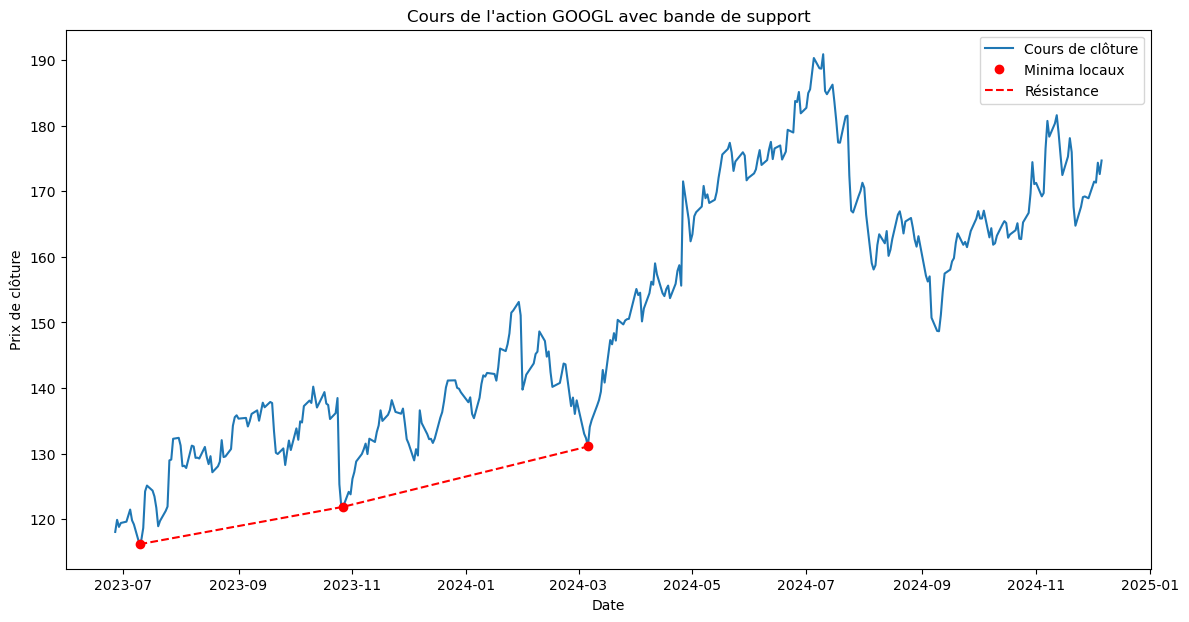

In [19]:
# On réprend exactement le code du graphique précédent mais cette fois-ci avec le traçage de la bande
# support qui comporte seulement nos 3 points sélectionnées

plt.figure(figsize=(14, 7)) # on choisit les dimensions du cadre, du graphique
plt.plot(data.index, data['Close'], label='Cours de clôture') # on trace la figure en donnant
# à la fonction plot la valeur de l'axe des abscisses (data.index), la valeur des ordonnées, data['Close']
# et un nom au graphique label='Cours de clôture'

# Tracer la bande support à travers les points sélectionnés
# .index permet de sélectionner la date
# .value permet de sélectionner la valeur (le cours de bourse)
# 'ro' signifie qu'on veut tracer des points rouges (red o)
# 'r--' signifie qu'on veut tracer une ligne en tirets --------- et 'r' signifie 'red' pour rouge
plt.plot(points_bande_support.index, points_bande_support.values, 'ro', label='Minima locaux') 
plt.plot(points_bande_support.index, points_bande_support.values, 'r--', label='Résistance')

# Ajouter des titres et légendes
# le xlabel est le titre de l'axe des 'x', des abscisses
# le ylabel est le titre de l'axe des 'y' , des ordonnées
plt.title(f'Cours de l\'action {ticker.ticker} avec bande de support')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

### Il nous reste à tout rassembler sur un seul et même graphique

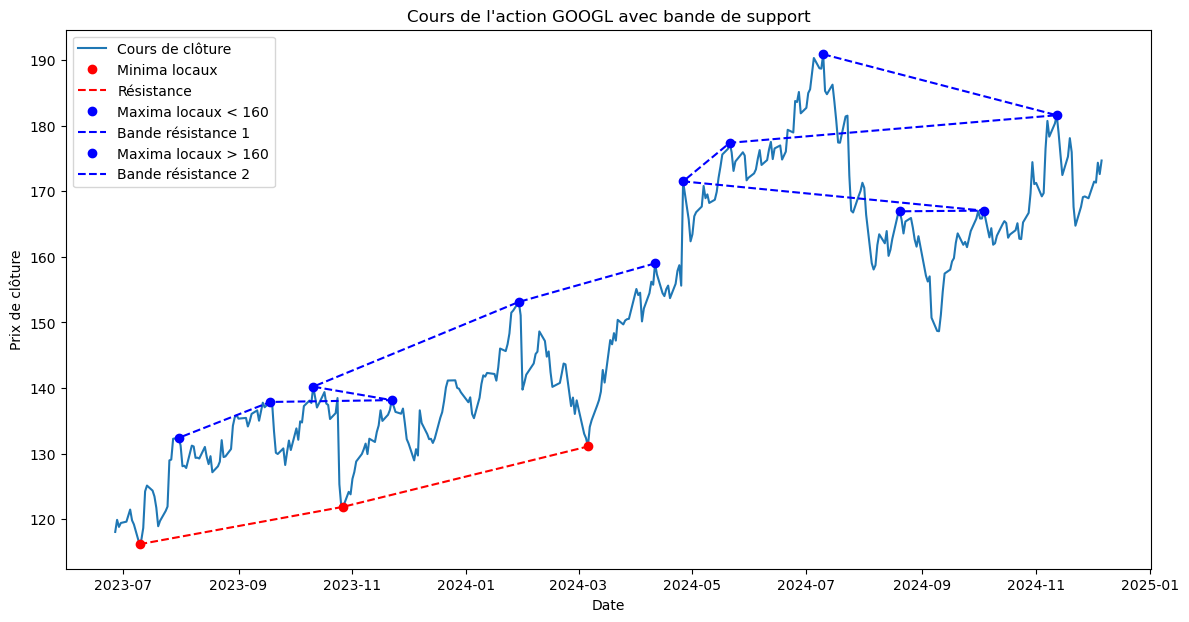

In [20]:
plt.figure(figsize=(14, 7)) 
plt.plot(data.index, data['Close'], label='Cours de clôture') 

plt.plot(points_bande_support.index, points_bande_support.values, 'ro', label='Minima locaux') 
plt.plot(points_bande_support.index, points_bande_support.values, 'r--', label='Résistance')


plt.plot(max_locaux1.index, max_locaux1.values, 'bo', label='Maxima locaux < 160')
plt.plot(max_locaux1.index, max_locaux1.values, linestyle= '--', color='blue', label='Bande résistance 1')


plt.plot(max_locaux2.index, max_locaux2.values, 'bo', label='Maxima locaux > 160')
plt.plot(max_locaux2.index, max_locaux2.values, linestyle= '--',  color='blue', label='Bande résistance 2')

plt.title(f'Cours de l\'action {ticker.ticker} avec bande de support')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()